# Prelecture

## Question 1: STD
Standard deviation measures the spread or variability of data points in a sample of the population, It describes the spread of the original data itself

Stand error of the mean quantifies the precision of the sample mean estimate, Intstead of telling spread, it tells how much the sample is expected to vary from the true population mean

## Question 2: Confidence Intervals
1. Find the mean of the sample data
2. Calculate standard error of the mean
3. Multiply the standard error of mean by 1.96 (z-score corresponding to 95%)
4. Add and subtract the margin of error calculated from the sample mean

## Question 3: Confidence Intervals with Bootstrapped Means
1. Generate multiple boostrapped samples
2. Calculate the mean of each bootstrapped samples
3. Sort the means in ascending order
4. Identify the 2.5th and 97.5th percentiles from the sorted list, these are the upper and lower bounds

## Question 4: Bootstrap Code

In [1]:
import numpy as np

# Example data sample
sample = np.array([10, 20, 30, 40, 50])

# Function to calculate the 95% bootstrap confidence interval for the mean
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, statistic_func=np.mean):
    bootstrap_samples = np.random.choice(data, size=(num_bootstrap_samples, len(data)), replace=True)
    bootstrap_statistics = np.apply_along_axis(statistic_func, axis=1, arr=bootstrap_samples)
    
    # Calculate the 2.5th and 97.5th percentiles (for a 95% confidence interval)
    lower_bound = np.percentile(bootstrap_statistics, 2.5)
    upper_bound = np.percentile(bootstrap_statistics, 97.5)
    
    return lower_bound, upper_bound

# Calculate 95% bootstrap confidence interval for the mean
mean_confidence_interval = bootstrap_confidence_interval(sample)
print("95% Bootstrap Confidence Interval for the Mean:", mean_confidence_interval)

# To change this to calculate a 95% confidence interval for the median, 
# simply pass np.median as the statistic_func parameter:
median_confidence_interval = bootstrap_confidence_interval(sample, statistic_func=np.median)
print("95% Bootstrap Confidence Interval for the Median:", median_confidence_interval)


95% Bootstrap Confidence Interval for the Mean: (18.0, 42.0)
95% Bootstrap Confidence Interval for the Median: (10.0, 50.0)


Here’s a summary of our exchanges for your homework assignment:

1. **Difference between Standard Error of the Mean and Standard Deviation:**  
   - We discussed the distinction between **standard deviation (SD)** and **standard error of the mean (SEM)**. SD measures the spread of individual data points around the sample mean, while SEM quantifies the variability in the estimate of the sample mean itself, becoming smaller as sample size increases.

2. **Using SEM for a 95% Confidence Interval:**  
   - You learned how to create a 95% confidence interval for the mean using SEM by multiplying the SEM by 1.96 and adding/subtracting this from the sample mean.

3. **Creating a 95% Bootstrapped Confidence Interval Without SEM:**  
   - We discussed how to construct a 95% confidence interval using bootstrapped sample means by generating multiple bootstrap samples, calculating the mean of each, and finding the 2.5th and 97.5th percentiles of the bootstrapped means to define the interval.

4. **Code for 95% Bootstrap Confidence Interval:**  
   - I provided Python code to compute a 95% bootstrap confidence interval for the sample mean. The code generates bootstrap samples, calculates their means, and then finds the percentiles for the confidence interval. The code also explains how to modify it to calculate the confidence interval for other statistics like the **median** by simply changing the statistic function from `np.mean` to `np.median`.

Let me know if you need anything else for your submission!
https://chatgpt.com/share/66ff19dd-a924-800b-8e1c-38a73e483d7e

# Postlecture

## Question 5: Population Parameter and Sample
Need to distinguish between the poopulation parameter and the sample statistic because a confidence interval is supposed to estimate the population parameter (which we don't know) based on the sample statistic (which is calculated from data). The sample statistic is just an estimate of the true population parameter and confidence interval provides a range in which we expect the true population parameter to lie with a certain confidence (the percentage)

## Question 6: Talking with a Friend
**1. What is the porcess of bootstrapping?** 
Bootstrapping is like pretending you have a lot of different samples, even though you only have one. If you have a sample of data points from a population, but you don’t know much about the population itself. Instead of gathering more data (which can be expensive or time-consuming), you create many new “fake” samples by randomly picking data points from your original sample with replacement (meaning you can pick the same data point more than once). Then, you calculate the statistic you're interested in (like the mean or median) for each of these new samples. Doing this a lot of times lets you get an idea of how your sample statistic might vary, and that helps you make inferences about the entire population.

**2. What is the main pupose of bootstrapping?**
The main purpose of bootstrapping is to estimate the uncertainty of a sample statistic. You use it to figure out how confident you can be in a statistic (like the mean or median) that you calculated from a single sample of data. It’s especially useful when you don’t have a lot of data or you don’t know the distribution of the population. Bootstrapping helps you generate confidence intervals or test when traditional methods might not work well.

**3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**
If you have a guess about the population’s average, but you only have a sample of size n, you could use bootstrapping to test your guess:

- Take your sample and generate a bunch of bootstrap samples by randomly sampling from your data with replacement.
- Calculate the mean for each of these bootstrap samples, so now you have a distribution of sample means.
- Create a confidence interval from this distribution of bootstrap means—say, a 95% confidence interval.
- Check if your hypothesized average falls within that confidence interval. If it does, your guess could be plausible. If it falls outside the interval, it’s less likely to be a good estimate of the true population average.

This process helps to see whether your guess is reasonable, based on the variability of the sample means you generated through bootstrapping.

## Question 7: On Average
A confidence interval overlapping zero fails to reject the null hypothesis because the interval suggests that zero (meaning no effect) is a plausible value for the true population parameter based on the data. Even though the observed sample mean is not zero, the confidence interval tells us there’s a range of possible values for the true mean, and if that range includes zero, we can’t confidently say the true effect is different from zero. Basically, the data is not strong enough to rule out the possibility that the drug has no effect on average.

To reject the null hypothesis, the confidence interval would need to exclude zero entirely. This would indicate that the true population mean is likely different from zero, meaning the drug is likely to have a real effect. If the confidence interval lies entirely above or below zero, it suggests the effect is either positive or negative, and we have enough evidence to reject the null hypothesis.

## Question 8: Vaccine Data

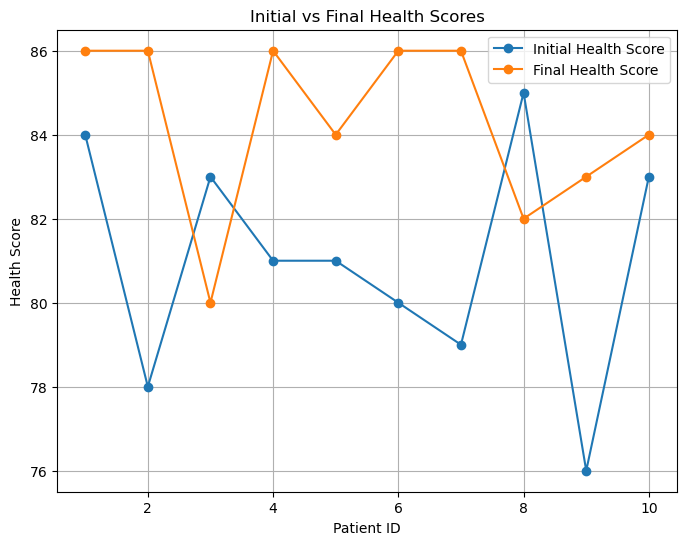

95% Bootstrap Confidence Interval for Health Improvement: (0.7, 5.5)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

# Define your data as a string (simulating reading from a CSV file)
data_str = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

# Use StringIO to read the string as if it were a CSV file
data = pd.read_csv(StringIO(data_str))

# Calculate the differences in health scores
data['HealthDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Visualize Initial vs Final Health Scores
plt.figure(figsize=(8, 6))
plt.plot(data['PatientID'], data['InitialHealthScore'], label='Initial Health Score', marker='o')
plt.plot(data['PatientID'], data['FinalHealthScore'], label='Final Health Score', marker='o')
plt.title('Initial vs Final Health Scores')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.legend()
plt.grid(True)
plt.show()

# Set a random seed for reproducibility
np.random.seed(42)

# Bootstrap function to calculate the confidence interval
def bootstrap_confidence_interval(data, num_samples=1000):
    bootstrap_means = []
    for _ in range(num_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)
    return lower_bound, upper_bound

# Get bootstrap confidence interval for the health differences
lower_ci, upper_ci = bootstrap_confidence_interval(data['HealthDifference'])

# Output the confidence interval
print(f"95% Bootstrap Confidence Interval for Health Improvement: ({lower_ci}, {upper_ci})")


- We resample the observed differences in health scores many times (with replacement) to generate multiple “bootstrap” samples.
- We compute the mean health improvement for each bootstrap sample.
- Using these bootstrap means, we calculate a 95% confidence interval for the mean health improvement by finding the 2.5th and 97.5th percentiles of the bootstrap distribution.

**Hypothesis Testing:**
Null Hypothesis (H₀): The vaccine has no effect on health, meaning the true mean difference in health scores is zero.
Alternative Hypothesis (H₁): The vaccine has an effect, meaning the true mean difference in health scores is not zero.

**Confidence Interval:**
If the confidence interval for the mean difference includes zero, we fail to reject the null hypothesis. If zero is excluded from the interval, we reject the null hypothesis.

**Conclusion Regarding the Null Hypothesis:**

The 95% bootstrap confidence interval for the mean health improvement is (0.7, 5.5). Since this confidence interval does not include zero, we can reject the null hypothesis. This suggests that the vaccine has a positive effect on health, with an average improvement in health scores between 0.7 and 5.5 points.

Here’s a summary of our exchanges for your homework assignment:

1. **Understanding Bootstrapping and Confidence Intervals:**
   - We discussed how to calculate a 95% bootstrap confidence interval to determine the effectiveness of a vaccine. The bootstrapping method resampled the differences in health scores to estimate the variability of the mean improvement.
   - I provided Python code to perform the bootstrapping and generate a confidence interval for the health improvement.

2. **Data Visualization:**
   - We visualized the **InitialHealthScore** and **FinalHealthScore** using a line plot to observe potential trends in health improvement.

3. **Quantitative Analysis:**
   - The bootstrapping process generated multiple resampled means, and the 95% confidence interval for the mean health improvement was found to be **(0.7, 5.5)**.
   - Since this interval does not include zero, we concluded that the vaccine likely has a positive effect on health, allowing us to reject the null hypothesis of "no effect."

4. **Final Python Code:**
   - I provided a complete working Python script that manually inputs the data using `StringIO` and calculates the confidence interval without needing an external CSV file. The script performs bootstrapping, generates visualizations, and outputs the confidence interval.

5. **Documentation and Conclusion:**
   - We structured the report to include an introduction to the hypothesis, a step-by-step explanation of the methodology (bootstrapping), and the final conclusion that the vaccine has a significant effect on health.

This summary should provide a comprehensive record of our interactions for your assignment. Let me know if you need anything else!


## Question 9:
yes